<a href="https://colab.research.google.com/github/mvu2ab/visualization/blob/main/assignment_(2).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment: Exploratory Data Analysis
### `! git clone https://github.com/ds4e/visualization`
### Do One.

In [1]:
! git clone https://github.com/ds4e/visualization

Cloning into 'visualization'...
remote: Enumerating objects: 38, done.
remote: Counting objects: 100% (8/8), done.
remote: Compressing objects: 100% (6/6), done.
remote: Total 38 (delta 3), reused 2 (delta 2), pack-reused 30 (from 1)
Receiving objects: 100% (38/38), 7.17 MiB | 9.90 MiB/s, done.
Resolving deltas: 100% (6/6), done.


**Q1.** This question provides some practice doing exploratory data analysis and visualization.

The "relevant" variables for this question are:
  - `level` - Level of institution (4-year, 2-year)
  - `aid_value` - The average amount of student aid going to undergraduate recipients
  - `control` - Public, Private not-for-profit, Private for-profit
  - `grad_100_value` - percentage of first-time, full-time, degree-seeking undergraduates who complete a degree or certificate program within 100 percent of expected time (bachelor's-seeking group at 4-year institutions)

1. Load the `./data/college_completion.csv` data with Pandas.
2. What are are the dimensions of the data? How many observations are there? What are the variables included? Use `.head()` to examine the first few rows of data.
3. Cross tabulate `control` and `level`. Describe the patterns you see.
4. For `grad_100_value`, create a histogram, kernel density plot, boxplot, and statistical description.
5. For `grad_100_value`, create a grouped kernel density plot by `control` and by `level`. Describe what you see. Use `groupby` and `.describe` to make grouped calculations of statistical descriptions of `grad_100_value` by `level` and `control`. Which institutions appear to have the best graduation rates?
6. Create a new variable, `df['levelXcontrol']=df['level']+', '+df['control']` that interacts level and control. Make a grouped kernel density plot. Which institutions appear to have the best graduation rates?
7. Make a kernel density plot of `aid_value`. Now group your graph by `level` and `control`. What explains the shape of the graph? Use `groupby` and `.describe` to make grouped calculations of statistical descriptions of `aid_value` by `level` and `control`.
8. Make a scatterplot of `grad_100_value` by `aid_value`. Describe what you see. Now make the same plot, grouping by `level` and then `control`. Describe what you see. For which kinds of institutions does aid seem to increase graduation rates?

In [3]:
import pandas as pd

df = pd.read_csv('/content/visualization/assignment/data/college_completion.csv')

In [6]:
df.shape

(3798, 63)

In [5]:
df.shape[0]

3798

In [7]:
df.head()

,index,unitid,chronname,city,state,level,control,basic,hbcu,flagship,...,vsa_grad_after6_transfer,vsa_grad_elsewhere_after6_transfer,vsa_enroll_after6_transfer,vsa_enroll_elsewhere_after6_transfer,similar,state_sector_ct,carnegie_ct,counted_pct,nicknames,cohort_size
0,0,100654,Alabama A&M University,Normal,Alabama,4-year,Public,Masters Colleges and Universities--larger prog...,X,NaN,...,36.4,5.6,17.2,11.1,232937|100724|405997|113607|139533|144005|2285...,13,386,99.7|07,NaN,882.0
1,1,100663,University of Alabama at Birmingham,Birmingham,Alabama,4-year,Public,Research Universities--very high research acti...,NaN,NaN,...,NaN,NaN,NaN,NaN,196060|180461|201885|145600|209542|236939|1268...,13,106,56.0|07,UAB,1376.0
2,2,100690,Amridge University,Montgomery,Alabama,4-year,Private not-for-profit,Baccalaureate Colleges--Arts & Sciences,NaN,NaN,...,NaN,NaN,NaN,NaN,217925|441511|205124|247825|197647|221856|1353...,16,252,100.0|07,NaN,3.0
3,3,100706,University of Alabama at Huntsville,Huntsville,Alabama,4-year,Public,Research Universities--very high research acti...,NaN,NaN,...,0.0,0.0,0.0,0.0,232186|133881|196103|196413|207388|171128|1900...,13,106,43.1|07,UAH,759.0
4,4,100724,Alabama State University,Montgomery,Alabama,4-year,Public,Masters Colleges and Universities--larger prog...,X,NaN,...,NaN,NaN,NaN,NaN,100654|232937|242617|243197|144005|241739|2354...,13,386,88.0|07,ASU,1351.0


In [8]:
# Cross-tabulation between 'control' and 'level'
ct = pd.crosstab(df['control'], df['level'])
print(ct)

level                   2-year  4-year
control                               
Private for-profit         465     527
Private not-for-profit      68    1180
Public                     926     632


For a 4-year instituion, it is likely that it will be private not-for-profit. For a 2-year instituion, it is likely that it will be public.

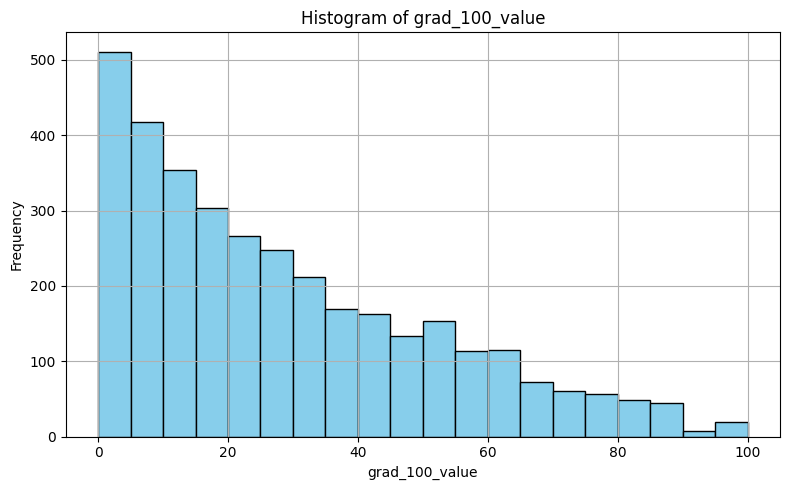

In [9]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
plt.hist(df['grad_100_value'], bins=20, color='skyblue', edgecolor='black')
plt.title('Histogram of grad_100_value')
plt.xlabel('grad_100_value')
plt.ylabel('Frequency')
plt.grid(True)
plt.tight_layout()
plt.show()


<ipython-input-10-df644f3882f9>:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['grad_100_value'], shade=True, color='purple')


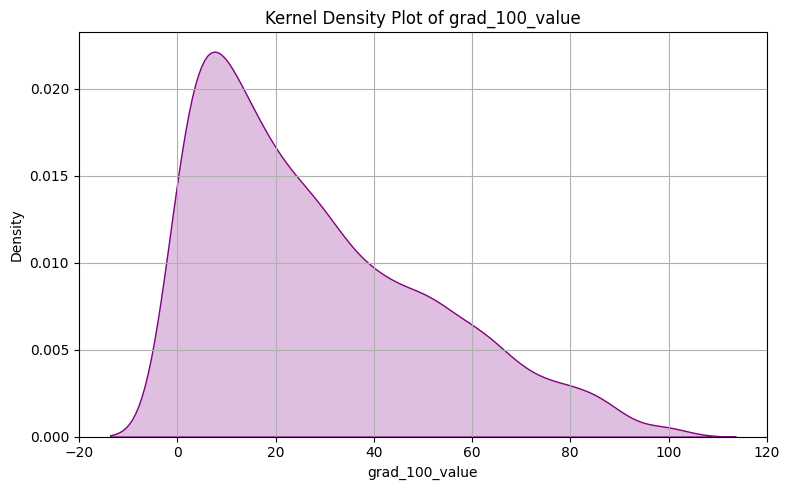

In [10]:
import seaborn as sns

plt.figure(figsize=(8, 5))
sns.kdeplot(df['grad_100_value'], shade=True, color='purple')
plt.title('Kernel Density Plot of grad_100_value')
plt.xlabel('grad_100_value')
plt.ylabel('Density')
plt.grid(True)
plt.tight_layout()
plt.show()


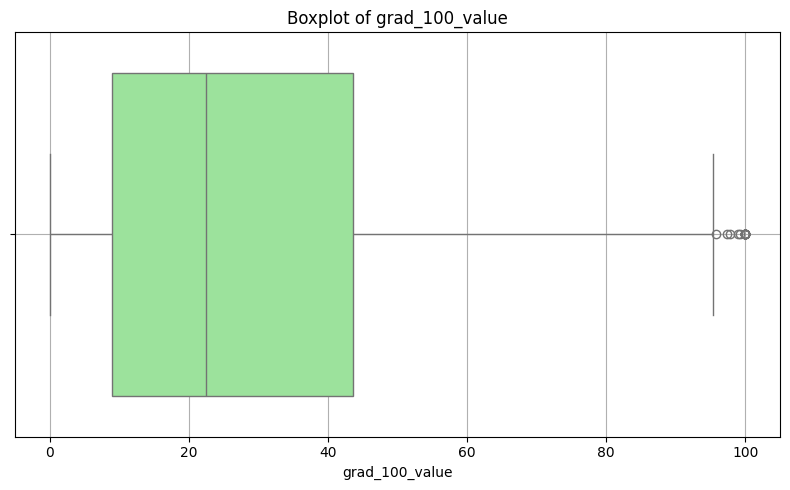

In [11]:
plt.figure(figsize=(8, 5))
sns.boxplot(x=df['grad_100_value'], color='lightgreen')
plt.title('Boxplot of grad_100_value')
plt.xlabel('grad_100_value')
plt.grid(True)
plt.tight_layout()
plt.show()


In [12]:
# Statistical Description
desc = df['grad_100_value'].describe()
print(desc)


count    3467.000000
mean       28.364465
std        23.312730
min         0.000000
25%         9.000000
50%        22.500000
75%        43.650000
max       100.000000
Name: grad_100_value, dtype: float64


<ipython-input-13-cbc10127d522>:7: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Control')


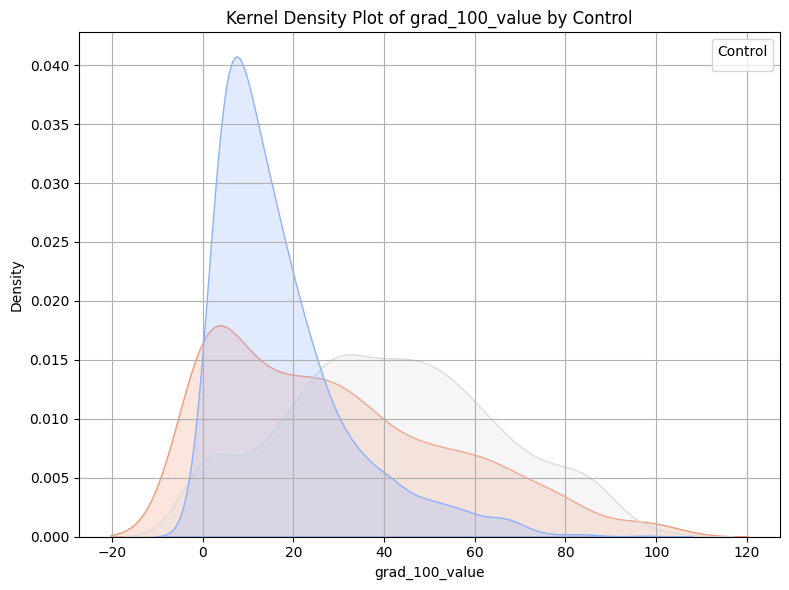

In [13]:
plt.figure(figsize=(8, 6))
sns.kdeplot(data=df, x='grad_100_value', hue='control', fill=True, common_norm=False, palette='coolwarm')
plt.title('Kernel Density Plot of grad_100_value by Control')
plt.xlabel('grad_100_value')
plt.ylabel('Density')
plt.legend(title='Control')
plt.grid(True)
plt.tight_layout()
plt.show()


<ipython-input-14-00b4047c4fb7>:7: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Level')


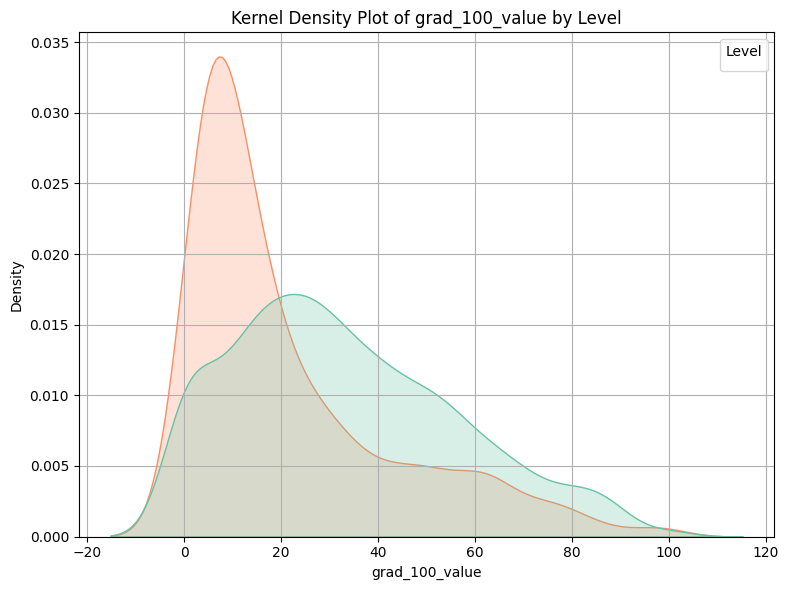

In [14]:
plt.figure(figsize=(8, 6))
sns.kdeplot(data=df, x='grad_100_value', hue='level', fill=True, common_norm=False, palette='Set2')
plt.title('Kernel Density Plot of grad_100_value by Level')
plt.xlabel('grad_100_value')
plt.ylabel('Density')
plt.legend(title='Level')
plt.grid(True)
plt.tight_layout()
plt.show()


In [15]:
control_desc = df.groupby('control')['grad_100_value'].describe()
print(control_desc)


                         count       mean        std  min    25%   50%    75%  \
control                                                                         
Private for-profit       779.0  29.108858  25.601687  0.0   6.95  24.7  46.75   
Private not-for-profit  1189.0  41.660976  23.551231  0.0  25.00  41.0  58.30   
Public                  1499.0  17.430887  14.729443  0.0   6.90  13.2  23.25   

                          max  
control                        
Private for-profit      100.0  
Private not-for-profit  100.0  
Public                   97.8  


In [16]:
level_desc = df.groupby('level')['grad_100_value'].describe()
print(level_desc)


         count       mean        std  min   25%   50%     75%    max
level                                                               
2-year  1455.0  21.636151  21.645747  0.0   6.0  13.0  30.600  100.0
4-year  2012.0  33.230119  23.270160  0.0  15.2  29.7  49.225  100.0


If the private institutions or high level schools have higher grad_100_value averages, then they would be considered to have the best graduation rates

<ipython-input-17-cfb563327a3c>:12: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Level, Control')


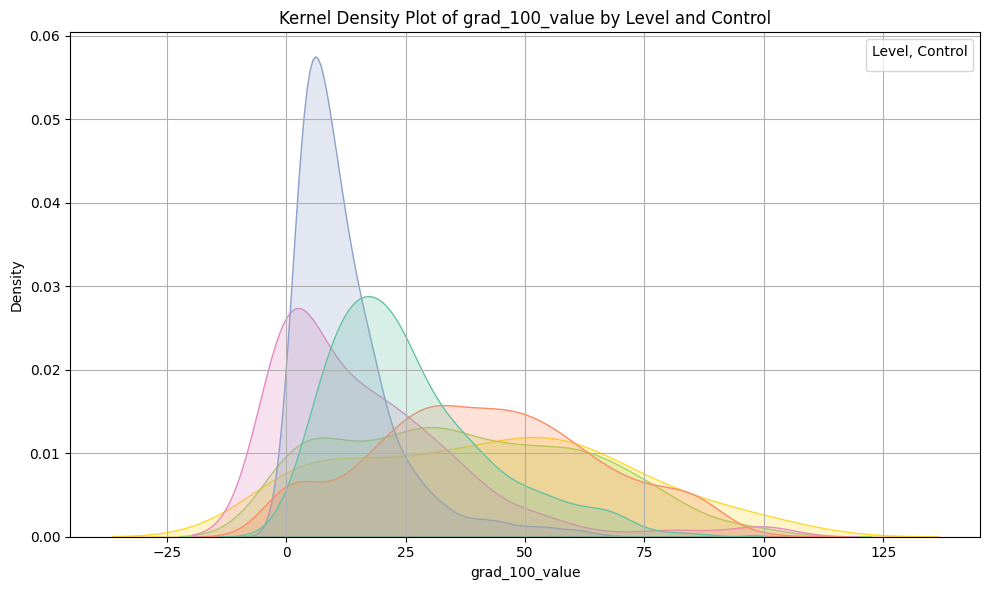

In [17]:
df['levelXcontrol'] = df['level'] + ', ' + df['control']

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.kdeplot(data=df, x='grad_100_value', hue='levelXcontrol', fill=True, common_norm=False, palette='Set2')
plt.title('Kernel Density Plot of grad_100_value by Level and Control')
plt.xlabel('grad_100_value')
plt.ylabel('Density')
plt.legend(title='Level, Control')
plt.grid(True)
plt.tight_layout()
plt.show()


In [18]:
levelXcontrol_desc = df.groupby('levelXcontrol')['grad_100_value'].describe()
print(levelXcontrol_desc)


                                 count       mean        std  min     25%  \
levelXcontrol                                                               
2-year, Private for-profit       461.0  37.197614  25.497380  0.0  15.800   
2-year, Private not-for-profit    68.0  41.913235  28.348302  0.0  16.225   
2-year, Public                   926.0  12.400000  10.893600  0.0   5.100   
4-year, Private for-profit       318.0  17.382704  20.788525  0.0   0.000   
4-year, Private not-for-profit  1121.0  41.645674  23.243453  0.0  25.000   
4-year, Public                   573.0  25.561082  16.403902  0.0  13.600   

                                 50%     75%    max  
levelXcontrol                                        
2-year, Private for-profit      33.9  57.800  100.0  
2-year, Private not-for-profit  44.4  61.200  100.0  
2-year, Public                   9.4  16.175   97.8  
4-year, Private for-profit      12.5  26.325  100.0  
4-year, Private not-for-profit  41.0  57.800  100.0  
4-yea

2-year, Private not-for-profit institutions are very successful.


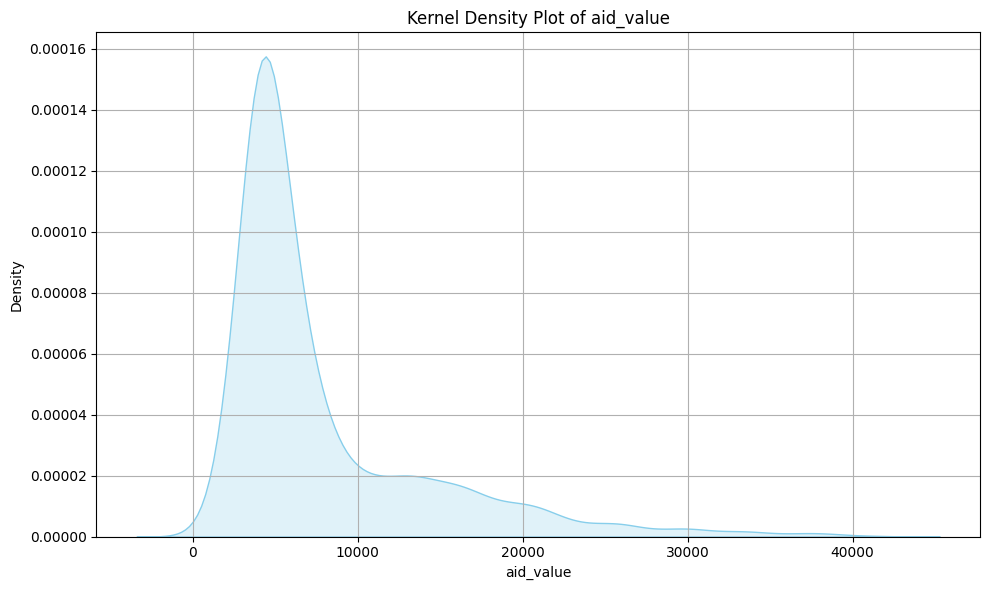

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.kdeplot(data=df, x='aid_value', fill=True, color='skyblue', common_norm=False)
plt.title('Kernel Density Plot of aid_value')
plt.xlabel('aid_value')
plt.ylabel('Density')
plt.grid(True)
plt.tight_layout()
plt.show()


<ipython-input-20-6b72dd77f0cb>:7: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Group', loc='upper right')


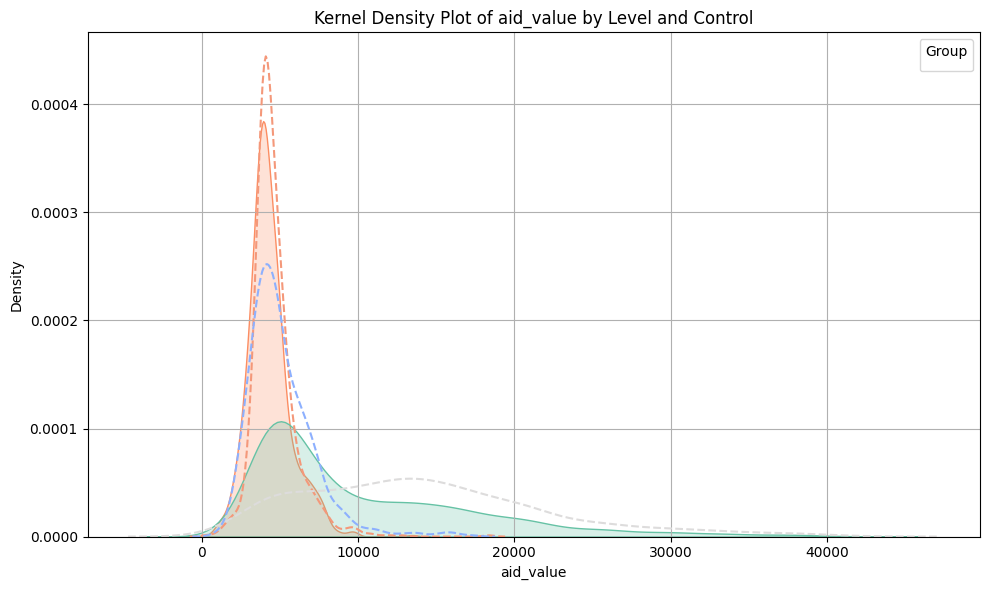

In [20]:
plt.figure(figsize=(10, 6))
sns.kdeplot(data=df, x='aid_value', hue='level', fill=True, common_norm=False, palette='Set2')
sns.kdeplot(data=df, x='aid_value', hue='control', fill=False, common_norm=False, palette='coolwarm', linestyle='--')
plt.title('Kernel Density Plot of aid_value by Level and Control')
plt.xlabel('aid_value')
plt.ylabel('Density')
plt.legend(title='Group', loc='upper right')
plt.grid(True)
plt.tight_layout()
plt.show()


Most of the lines peak at the same value.

In [21]:
level_desc = df.groupby('level')['aid_value'].describe()
print("Statistical Description by Level:")
print(level_desc)


Statistical Description by Level:
         count          mean          std    min     25%     50%      75%  \
level                                                                       
2-year  1458.0   4310.878601  1384.045631  294.0  3485.5  4113.0   4890.0   
4-year  2339.0  10235.379222  7227.369167  902.0  4830.5  7222.0  14046.0   

            max  
level            
2-year  13654.0  
4-year  41580.0  


In [22]:
control_desc = df.groupby('control')['aid_value'].describe()
print("Statistical Description by Control:")
print(control_desc)


Statistical Description by Control:
                         count          mean          std    min      25%  \
control                                                                     
Private for-profit       991.0   4632.206862  1399.121259  294.0  3861.50   
Private not-for-profit  1248.0  14180.722756  7772.700998  902.0  8325.00   
Public                  1558.0   5094.835687  2136.436370  881.0  3725.25   

                            50%      75%      max  
control                                            
Private for-profit       4331.0   5131.5  18355.0  
Private not-for-profit  13322.0  18571.0  41580.0  
Public                   4667.0   6087.5  17299.0  


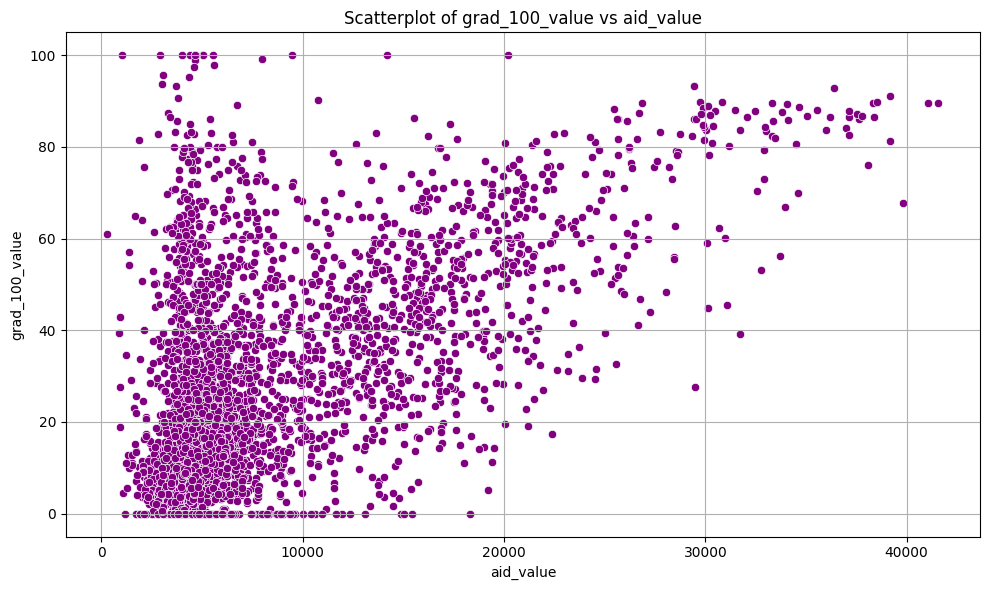

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.scatterplot(x='aid_value', y='grad_100_value', data=df, color='purple')
plt.title('Scatterplot of grad_100_value vs aid_value')
plt.xlabel('aid_value')
plt.ylabel('grad_100_value')
plt.grid(True)
plt.tight_layout()
plt.show()


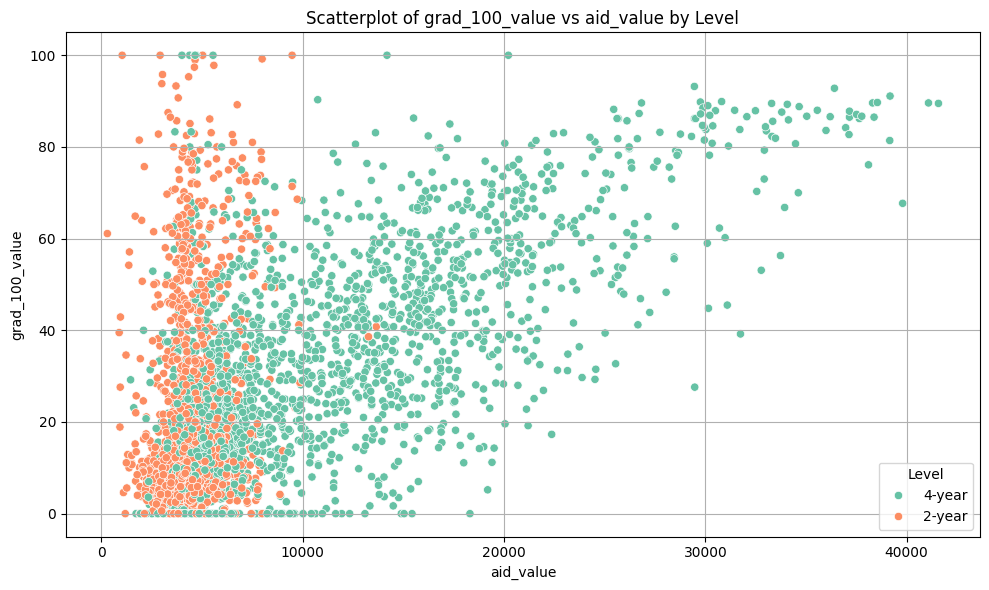

In [25]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='aid_value', y='grad_100_value', data=df, hue='level', palette='Set2')
plt.title('Scatterplot of grad_100_value vs aid_value by Level')
plt.xlabel('aid_value')
plt.ylabel('grad_100_value')
plt.legend(title='Level')
plt.grid(True)
plt.tight_layout()
plt.show()


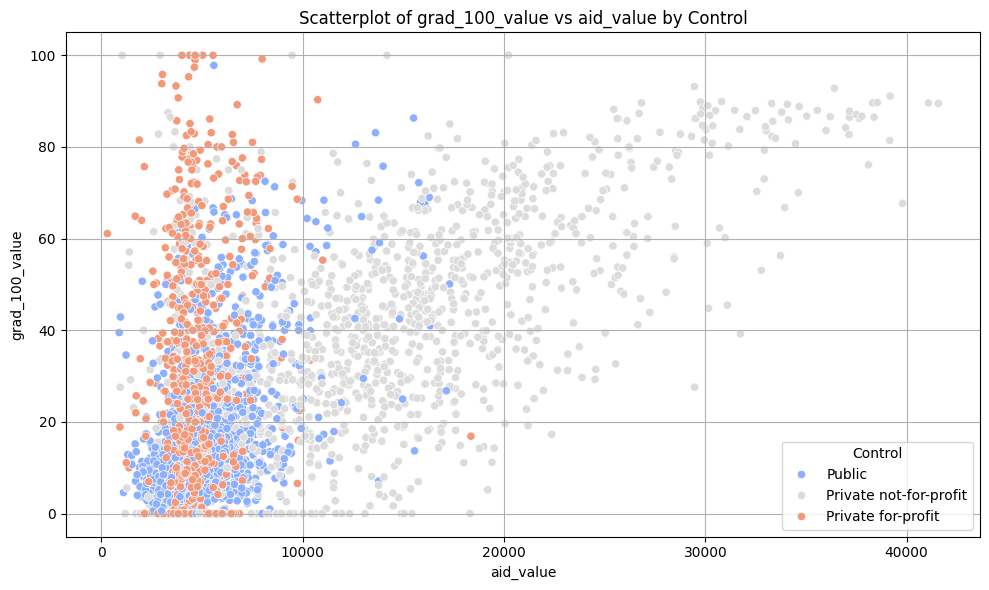

In [26]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='aid_value', y='grad_100_value', data=df, hue='control', palette='coolwarm')
plt.title('Scatterplot of grad_100_value vs aid_value by Control')
plt.xlabel('aid_value')
plt.ylabel('grad_100_value')
plt.legend(title='Control')
plt.grid(True)
plt.tight_layout()
plt.show()


Most of the aid comes from private not-for-profit 4-year institutions. This aid then increases their overall graduation rates.